In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
data.shape

(299, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EDA

Living : 203 
Dead : 96


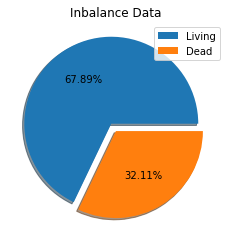

In [7]:
# Classification data of 1 or 0.

len_live = len(data['DEATH_EVENT'][data.DEATH_EVENT == 0])

# len_death = len(data['DEATH_EVENT'][data['DEATH_EVENT'] == 1])

len_death = data.loc[data.DEATH_EVENT == 1].count()[0]

labels = ['Living','Dead']

plt.pie([len_live, len_death], labels=labels, explode = [0.1,0], shadow = True, autopct = '%.2f%%', labeldistance = None)

print(f'Living : {len_live} \nDead : {len_death}')
plt.title('Inbalance Data')
plt.legend()
plt.show()


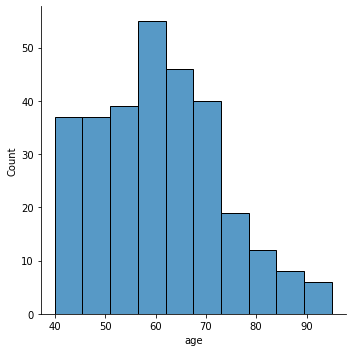

In [8]:
sns.displot(data['age'])

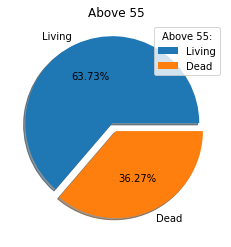

In [9]:
# age above 55

age_55_live = len(data.DEATH_EVENT[data.age >=55][data.DEATH_EVENT == 0])
age_55_death = len(data.DEATH_EVENT[data.age >= 55][data.DEATH_EVENT == 1])

labels = ['Living', 'Dead']

plt.pie([age_55_live, age_55_death], labels = labels, explode = [0.1, 0], shadow = True, autopct = '%.2f%%')

plt.title('Above 55')
plt.legend(title = 'Above 55:')
plt.show()

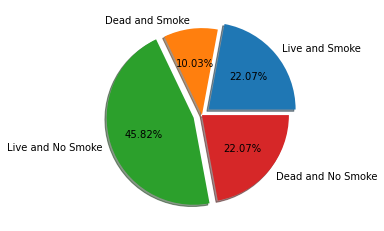

Youre more likely to Die if you dont smoke, than by smoking.


In [10]:
# smoking 

smoke_live = len(data.DEATH_EVENT[data.smoking == 1][data.DEATH_EVENT == 0])
smoke_death = len(data.DEATH_EVENT[data.smoking ==1][data.DEATH_EVENT == 1])
no_smoke_live = len(data.DEATH_EVENT[data.smoking == 0][data.DEATH_EVENT == 0])
no_smoke_death = len(data.DEATH_EVENT[data.smoking ==0][data.DEATH_EVENT == 1])

labels = ['Live and Smoke','Dead and Smoke', 'Live and No Smoke', 'Dead and No Smoke']

plt.pie([smoke_live, smoke_death, no_smoke_live, no_smoke_death], labels = labels, explode = [0.1,0, 0.1, 0], autopct = '%.2f%%', shadow = True)
plt.title('')
plt.show()

print('Youre more likely to Die if you dont smoke, than by smoking.')

In [11]:
# How many people have/ not have - 

print('Smoking = Yes : ',data.loc[data.smoking == 1].count()[0])
print('Smoking = No : ',data.loc[data.smoking == 0].count()[0])
print('Diabetes = Yes : ',data.loc[data.diabetes == 1].count()[0])
print('Diabetes = No: ',data.loc[data.diabetes == 0].count()[0])
print('HBP = Yes : ',data.loc[data.high_blood_pressure == 1].count()[0])
print('HBP = No : ', data.loc[data.high_blood_pressure == 0].count()[0])

Smoking = Yes :  96
Smoking = No :  203
Diabetes = Yes :  125
Diabetes = No:  174
HBP = Yes :  105
HBP = No :  194


C:\Users\dell\AppData\Local\Temp/ipykernel_10440/1982915244.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_live = data.loc[data.diabetes == 1][data.DEATH_EVENT == 0].count()[0]
C:\Users\dell\AppData\Local\Temp/ipykernel_10440/1982915244.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diabetes_death = data.loc[data.diabetes == 1][data.DEATH_EVENT == 1].count()[0]
C:\Users\dell\AppData\Local\Temp/ipykernel_10440/1982915244.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_diabetes_live = data.loc[data.diabetes == 0][data.DEATH_EVENT == 0].count()[0]
C:\Users\dell\AppData\Local\Temp/ipykernel_10440/1982915244.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_diabetes_death = data.loc[data.diabetes == 0][data.DEATH_EVENT == 1].count()[0]


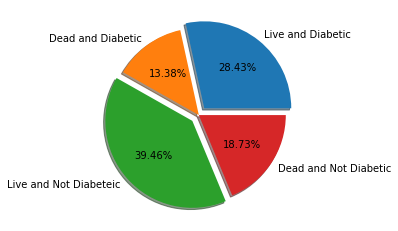

In [12]:
# Diabetes

diabetes_live = data.loc[data.diabetes == 1][data.DEATH_EVENT == 0].count()[0]
diabetes_death = data.loc[data.diabetes == 1][data.DEATH_EVENT == 1].count()[0]
no_diabetes_live = data.loc[data.diabetes == 0][data.DEATH_EVENT == 0].count()[0]
no_diabetes_death = data.loc[data.diabetes == 0][data.DEATH_EVENT == 1].count()[0]

labels = ['Live and Diabetic','Dead and Diabetic','Live and Not Diabeteic','Dead and Not Diabetic']

arr = np.array([diabetes_live, diabetes_death, no_diabetes_live, no_diabetes_death])

plt.pie(arr, labels=labels, explode = [0.1,0,0.1,0], shadow = True, autopct = '%.2f%%')

plt.show()

<AxesSubplot:>

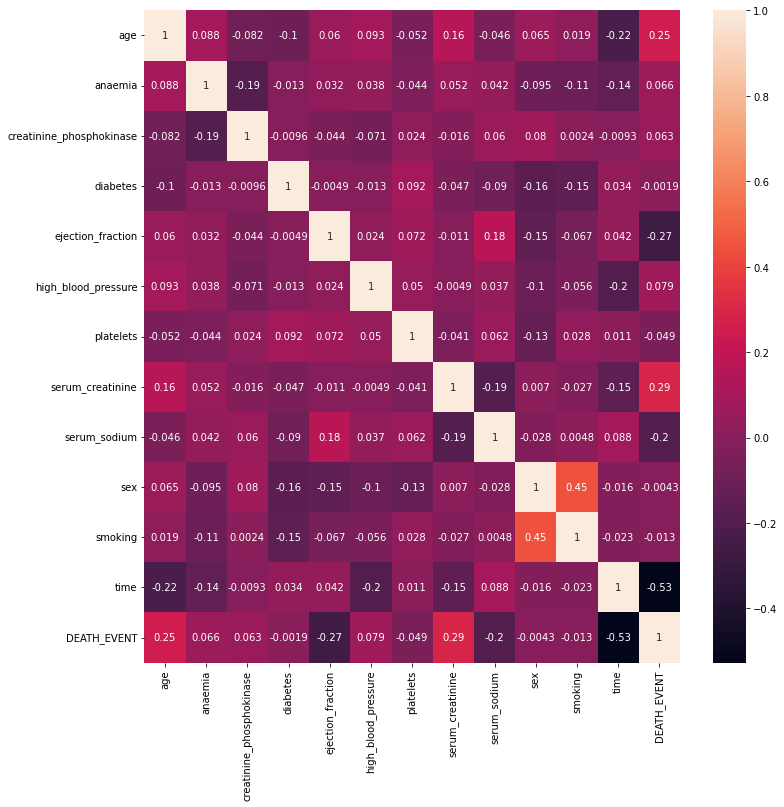

In [13]:
# Correlation 

corr = data.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(corr, annot = True)


In [14]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('DEATH_EVENT', axis = 1)
y = data.DEATH_EVENT

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

print('Shape of X Train ', X_train.shape)
print('Shape of X Test ', X_test.shape)

print('Shape of y Train ', y_train.shape)
print('Shape of y Test ', y_test.shape)

Shape of X Train  (239, 12)
Shape of X Test  (60, 12)
Shape of y Train  (239,)
Shape of y Test  (60,)


In [16]:
# Making a function to calculate metrics

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

def model_acc(y_test, y_pred):
    print('Accuracy : ', accuracy_score(y_test, y_pred))
    print('Precision : ', precision_score(y_test, y_pred)) # TP/TP+FP
    print('Recall : ', recall_score(y_test, y_pred)) # TP/TP+FN
    print('Confusion : ', confusion_matrix(y_test, y_pred))

In [17]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

model_acc(y_test, lr_pred)

Accuracy :  0.7333333333333333
Precision :  0.8181818181818182
Recall :  0.391304347826087
Confusion :  [[35  2]
 [14  9]]


In [18]:
# lR with Standard Scaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_pip = make_pipeline(StandardScaler(), LogisticRegression())
lr_pip.fit(X_train, y_train)

lr_pip_pred = lr_pip.predict(X_test)

model_acc(y_test, lr_pip_pred)

Accuracy :  0.7833333333333333
Precision :  0.9166666666666666
Recall :  0.4782608695652174
Confusion :  [[36  1]
 [12 11]]


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001,0.00001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.708, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.702, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.708, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.702, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.708, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.688, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.688, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.688, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.702, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.688, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [20]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [21]:
# SVM

svc = SVC(C = 100, gamma = 0.0001)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
model_acc(y_test, svc_pred)

Accuracy :  0.6166666666666667
Precision :  0.5
Recall :  0.08695652173913043
Confusion :  [[35  2]
 [21  2]]


In [22]:
# Decision Tree 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def rand_search(params, runs = 10, clf = DecisionTreeClassifier(random_state = 2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_
    
    print('Training Score : ', best_score)
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test Score : ', accuracy)
    
    return best_model

In [23]:
rand_search(params = {'criterion':['entropy','gini'],
                      'splitter':['random','best'],
                      'min_weight_fraction_leaf':[0,0.0025,0.005,0.0075,0.01],
                      'min_samples_split':[2,3,4,5,6,7,8],
                      'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                      'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                      'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                      'max_depth':[None, 2,4,6,8],
                      'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
})


Training Score :  0.8534574468085105
Test Score :  0.8166666666666667


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.85,
                       max_leaf_nodes=15, min_impurity_decrease=0.05,
                       min_samples_split=8, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [24]:
DT_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.85, max_leaf_nodes=15,
                                min_impurity_decrease=0.05, min_samples_split=8,
                                min_weight_fraction_leaf=0.0075, random_state=2)
DT_clf.fit(X_train, y_train)
DT_pred = DT_clf.predict(X_test)
model_acc(y_test, DT_pred)

Accuracy :  0.8166666666666667
Precision :  0.875
Recall :  0.6086956521739131
Confusion :  [[35  2]
 [ 9 14]]


In [25]:
from sklearn.ensemble import RandomForestClassifier

rand_search(params={
    'min_samples_leaf':[1,2,4,6,8,10,20,30],
    'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'max_depth':[None,2,4,6,8,10,20], 
    
}, clf=RandomForestClassifier(random_state=2))

Training Score :  0.8533687943262411
Test Score :  0.8166666666666667


RandomForestClassifier(max_depth=2, max_features=0.8, min_impurity_decrease=0.1,
                       random_state=2)

In [26]:
RF_clf = RandomForestClassifier(max_depth=2, max_features=0.8, min_impurity_decrease=0.1, random_state=2)
RF_clf.fit(X_train,y_train)
RF_pred = RF_clf.predict(X_test)
model_acc(y_test, RF_pred)

Accuracy :  0.8166666666666667
Precision :  0.9285714285714286
Recall :  0.5652173913043478
Confusion :  [[36  1]
 [10 13]]


In [28]:
   """"
    #'criterion':['gini','entropy'],
    #'max_depth':[None, 2,3,4,5,6,7,8,9,10,15,20],
    #'min_samples_split':[2,3,4,5,6,7,8,9,10,15,20],
    'min_samples_leaf':[1,2,4,6,8,10],
    'max_featues':['auto', 0.8, 0.6, 0.4],
    #'max_leaf_nodes':[5,10,15,20,25,30],
    'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2]
    """

'"\n #\'criterion\':[\'gini\',\'entropy\'],\n #\'max_depth\':[None, 2,3,4,5,6,7,8,9,10,15,20],\n #\'min_samples_split\':[2,3,4,5,6,7,8,9,10,15,20],\n \'min_samples_leaf\':[1,2,4,6,8,10],\n \'max_featues\':[\'auto\', 0.8, 0.6, 0.4],\n #\'max_leaf_nodes\':[5,10,15,20,25,30],\n \'min_impurity_decrease\':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2]\n '

In [33]:
from xgboost import XGBClassifier
xb1 = XGBClassifier(learning_rate = 0.1, max_depth = 4, n_estimatore = 400,
                   subsample=1.0)
eval_set = [(X_test, y_test)]
xb1.fit(X_train, y_train, early_stopping_rounds=10,
      eval_metric='logloss', eval_set=eval_set, verbose=True)


[01:33:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "n_estimatore" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.64689
[1]	validation_0-logloss:0.60789
[2]	validation_0-logloss:0.57185
[3]	validation_0-logloss:0.54400
[4]	validation_0-logloss:0.52026
[5]	validation_0-logloss:0.50044
[6]	validation_0-logloss:0.48670
[7]	validation_0-logloss:0.46671
[8]	validation_0-logloss:0.45347
[9]	validation_0-logloss:0.44399
[10]	validation_0-logloss:0.43695
[11]	validation_0-logloss:0.42949
[12]	validation_0-logloss:0.42443
[13]	validation_0-logloss:0.41816
[14]	validation_0-logloss:0.41175
[15]	validation_0-logloss:0.40732
[16]	validation_0-logloss:0.40487
[17]	validation_0-logloss:0.40202
[18]	validation_0-logloss:0.39875
[

c:\users\dell\miniconda3\envs\mydlenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimatore=400, n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
xbpred = xb1.predict(X_test)
model_acc(y_test, xbpred)

Accuracy :  0.8166666666666667
Precision :  0.875
Recall :  0.6086956521739131
Confusion :  [[35  2]
 [ 9 14]]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

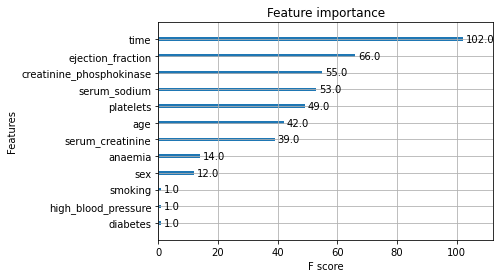

In [35]:
from xgboost import plot_importance
plot_importance(xb1)

In [37]:
# GBDT

from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(random_state=0)
gbdt.fit(X_train, y_train)

gbdt_pred = gbdt.predict(X_test)
model_acc(y_test, gbdt_pred)

Accuracy :  0.8333333333333334
Precision :  0.8823529411764706
Recall :  0.6521739130434783
Confusion :  [[35  2]
 [ 8 15]]


In [38]:
import joblib

joblib.dump(gbdt, 'HeartFailureModel.pkl')
model = joblib.load('HeartFailureModel.pkl')
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)